<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                            This is the Jupyter Notebook Created by Uygar Aras for IE423 Course Task 2

#**Initialize**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

#**Load the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfMlb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/footballers/final_data.csv')

In [ ]:
dfMlb.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [ ]:
y = dfMlb.loc[:,['current_value']]

#**Exploratory Data Analysis (EDA)**
Here, we explore the dataset to understand its structure and basic statistics. We look at the first few rows and the summary statistics of the features.

In [ ]:
x = dfMlb.loc[:,['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'goals conceded', 'clean sheets',
            'minutes played', 'days_injured', 'games_injured', 'award', 'highest_value', 'position_encoded', 'winger']]


In [ ]:
x.head()

,height,age,appearance,goals,assists,yellow cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
0,189.0,32.0,104,0.000000,0.000000,0.009585,1.217252,0.335463,9390,42,5,13,70000000,1,0
1,196.0,30.0,15,0.000000,0.000000,0.069018,1.242331,0.207055,1304,510,58,1,22000000,1,0
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.616438,0.924658,292,697,84,4,6000000,1,0
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.000000,0.000000,6408,175,22,9,50000000,2,0
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.000000,0.000000,5031,238,51,21,80000000,2,0


In [ ]:
x.describe()

,height,age,appearance,goals,assists,yellow cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,2.000000e+08,4.000000,1.000000


# **Decision Tree Regressor**
We build a Decision Tree Regressor to predict the current value of football players. We visualize the tree to understand how the model makes decisions.

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

# Fix the seed to the random number generator to ensure same results each run.
mdlDtrMlb = DecisionTreeRegressor(random_state=1)

In [ ]:
mdlDtrMlb.fit(x,y)

DecisionTreeRegressor(random_state=1)

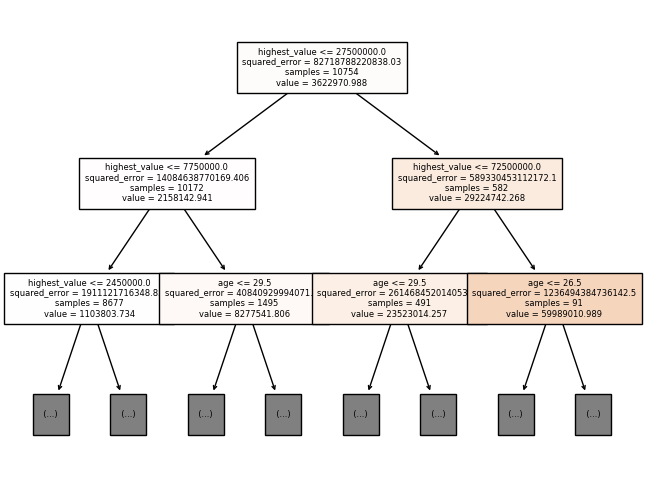

In [ ]:
# Show model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=x.columns, fontsize= 6, filled=True)
plt.show()

In [ ]:
print('First few players:')
print(x.head())
print('Value predictions:')
print(mdlDtrMlb.predict(x.head()))

First few players:
   height   age  appearance     goals   assists  yellow cards  goals conceded  \
0   189.0  32.0         104  0.000000  0.000000      0.009585        1.217252   
1   196.0  30.0          15  0.000000  0.000000      0.069018        1.242331   
2   188.0  37.0           4  0.000000  0.000000      0.000000        0.616438   
3   175.0  25.0          82  0.028090  0.056180      0.224719        0.000000   
4   191.0  30.0          63  0.017889  0.017889      0.053667        0.000000   

   clean sheets  minutes played  days_injured  games_injured  award  \
0      0.335463            9390            42              5     13   
1      0.207055            1304           510             58      1   
2      0.924658             292           697             84      4   
3      0.000000            6408           175             22      9   
4      0.000000            5031           238             51     21   

   highest_value  position_encoded  winger  
0       70000000      

In [ ]:
y.head()

,current_value
0,15000000
1,1500000
2,600000
3,50000000
4,40000000


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = mdlDtrMlb.predict(x)
print('MAE:')
print(mean_absolute_error(y,y_pred))

MAE:
2.3247163846010785


# **Train-Test Split and Model Evaluation**
We split the data into training and test sets to evaluate the model's performance. We use Mean Absolute Error (MAE) as the evaluation metric.


In [ ]:
from sklearn.model_selection import train_test_split

# Split features and target into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2,random_state=1)

In [ ]:
# Rebuild model
mdlDtrMlbSpl = DecisionTreeRegressor(random_state=1)
mdlDtrMlbSpl.fit(x_train, y_train)

# Predict test data
y_test_pred = mdlDtrMlbSpl.predict(x_test)

# Evaluate test data actual vs prediction
print('MAE (after train-test-split):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (after train-test-split):
1386233.1473733147


In [ ]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, x_trn, x_tst, y_trn, y_tst):
    mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrMlbDpt.fit(x_trn,y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(x_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [ ]:
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, x_train, x_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  2478649.7854967955
Max leaf nodes:  50 	 Mean Absolute Error:  1324608.5738202804
Max leaf nodes:  500 	 Mean Absolute Error:  1253503.6542444527
Max leaf nodes:  50000 	 Mean Absolute Error:  1306816.5969316596


# **Random Forest Regressor**
We build a Random Forest Regressor to improve the prediction performance and evaluate it using MAE.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
mdlRfsMlb = RandomForestRegressor(random_state=1)

# Fit model
mdlRfsMlb.fit(x_train, y_train.values.ravel())

# Predict
y_test_pred = mdlRfsMlb.predict(x_test)

# Evaluate
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (Random Forest):
1021328.7366341237


# Model Comparison
We compare the performance of different models to choose the best one for our problem.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'Random Forest': RandomForestRegressor(random_state=1)
}

# Evaluate models
for name, model in models.items():
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} MAE: {mae}')


Linear Regression MAE: 2250739.742105033
Decision Tree MAE: 1386233.1473733147
Random Forest MAE: 1021328.7366341237


**We find out that Random Forest is the best model to use for this dataset**

# **Ensemble Methods**
We use stacking to combine multiple models for better predictions.

In [54]:
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('rf', RandomForestRegressor(random_state=1)),
    ('dt', DecisionTreeRegressor(random_state=1))
]

# Define stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit and evaluate
stacking_model.fit(x_train, y_train.values.ravel())
y_stack_pred = stacking_model.predict(x_test)
print(f'Stacking Model MAE: {mean_absolute_error(y_test, y_stack_pred)}')

Stacking Model MAE: 1048052.6886551107


 **When Random Forest and Stacking Model is compared, random forest performs better.**


---



# **Correlation Matrix Heatmap**
We visualize the correlation between features using a heatmap to understand the relationships and multicollinearity between them.


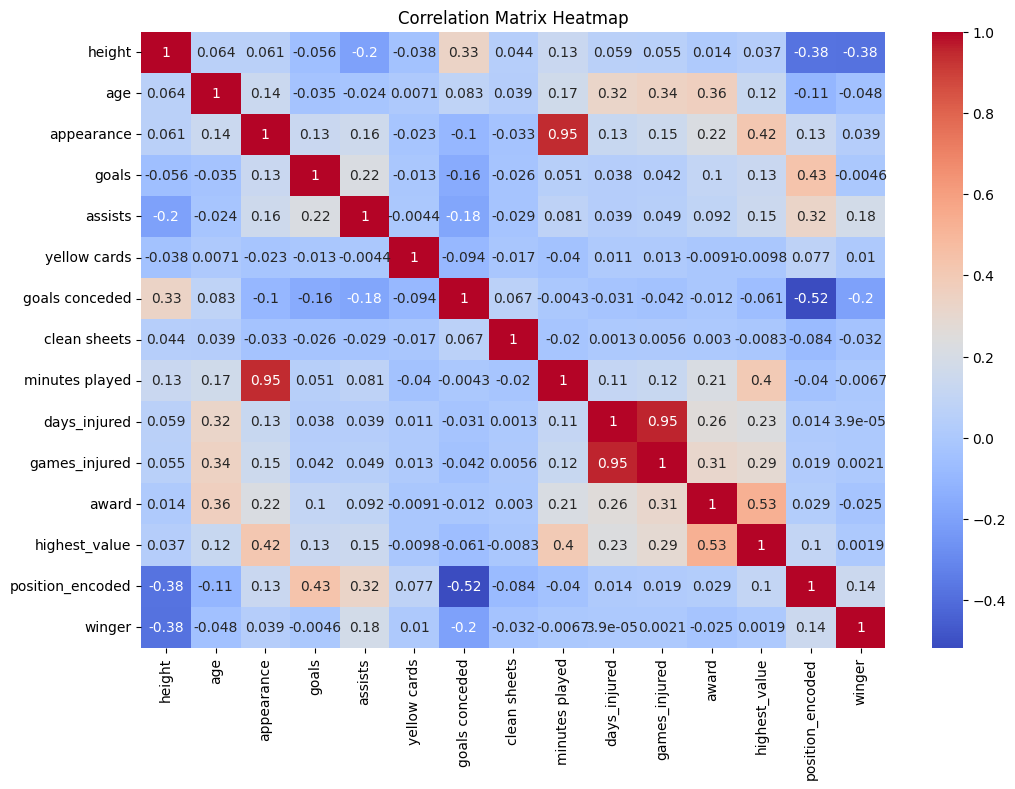

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Pair Plot**
We create pair plots to visualize the relationships between pairs of features in the dataset.


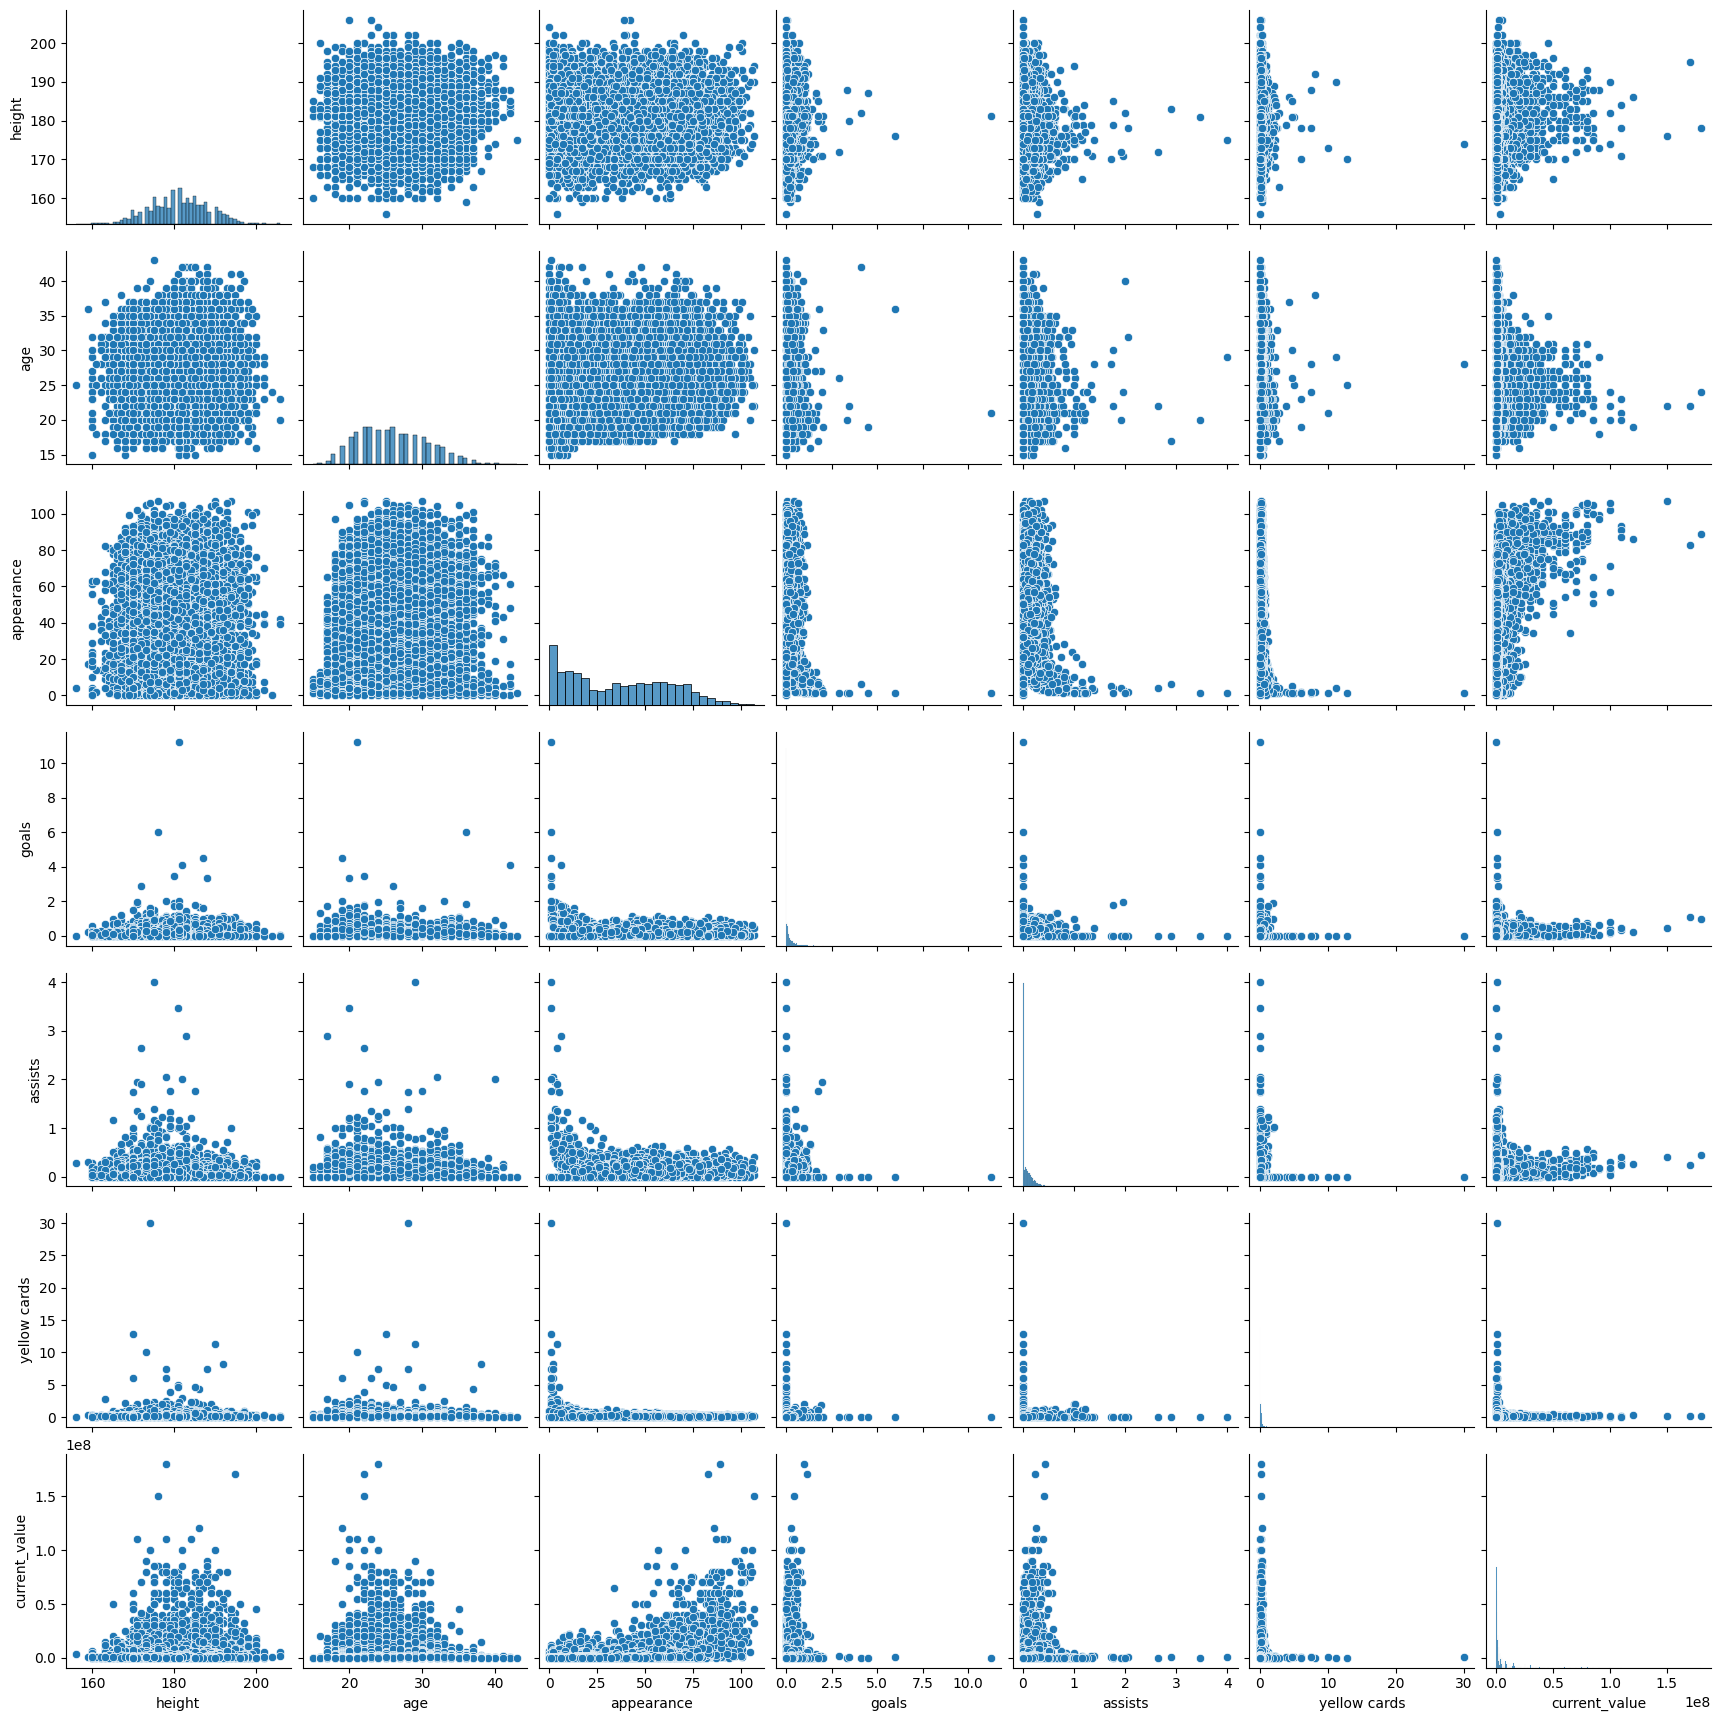

In [ ]:
sns.pairplot(dfMlb[['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'current_value']])
plt.show()

# **Feature Importance Plot (Random Forest)**
We visualize the importance of each feature in the Random Forest model to understand which features contribute the most to the predictions.


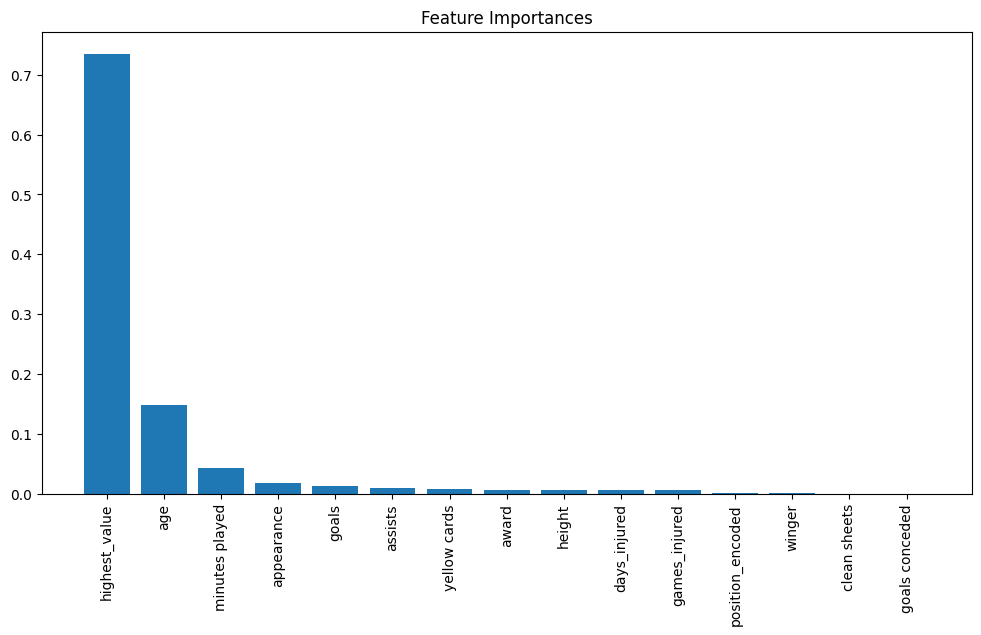

In [ ]:
feature_importances = mdlRfsMlb.feature_importances_
features = x.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

# **K-Means Clustering**
We apply K-Means clustering to group the players into clusters based on their attributes.


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1, n_init = 'auto')
x['cluster'] = kmeans.fit_predict(x)

#Visualize K-Means Clustering
Visualize the clusters using 'age' and 'highest_value'.

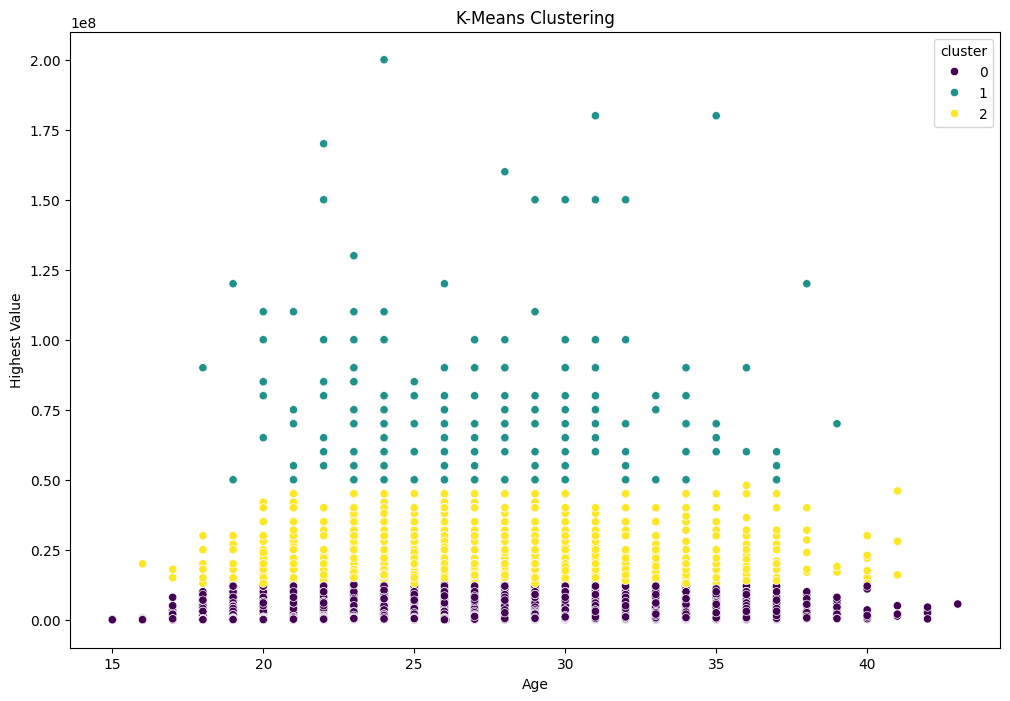

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='highest_value', hue='cluster', data=x, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Highest Value')
plt.show()

# **DBSCAN Clustering**
We apply DBSCAN clustering to identify clusters of players with varying shapes and densities.


In [ ]:
dbscan = DBSCAN(eps=3, min_samples=2)
x['dbscan_cluster'] = dbscan.fit_predict(x)

#Visualize DBSCAN clusters
Visualize the clusters using 'age' and 'highest_value'

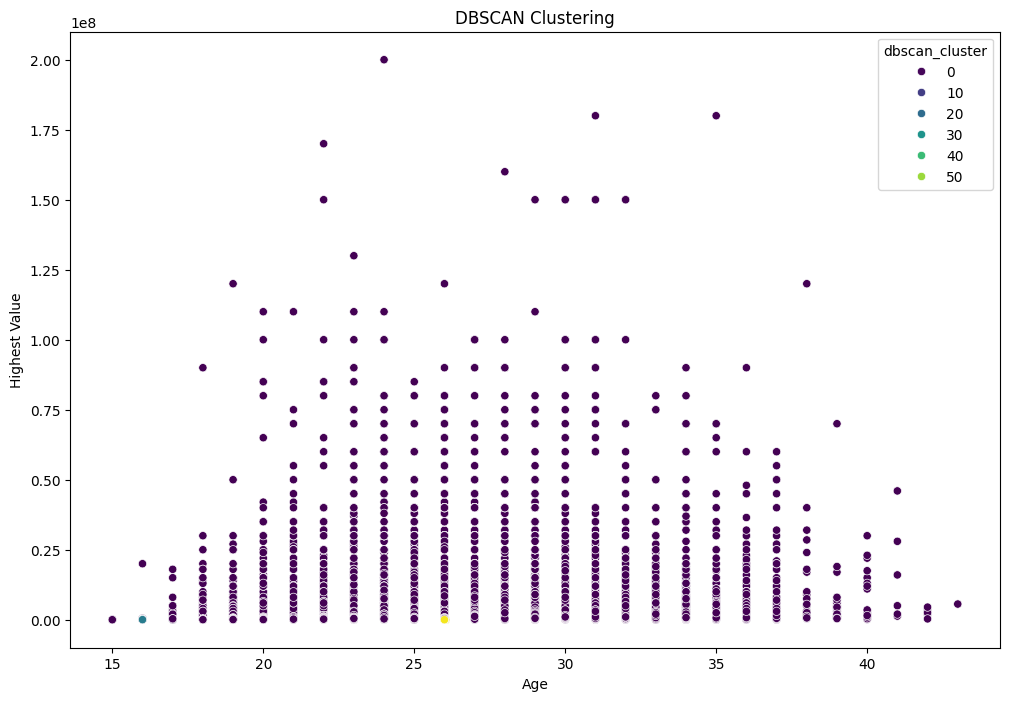

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='highest_value', hue='dbscan_cluster', data=x, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Highest Value')
plt.show()

# Principal Component Analysis (PCA)
We use PCA for dimensionality reduction before applying hierarchical clustering to visualize the clusters in a lower-dimensional space.

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

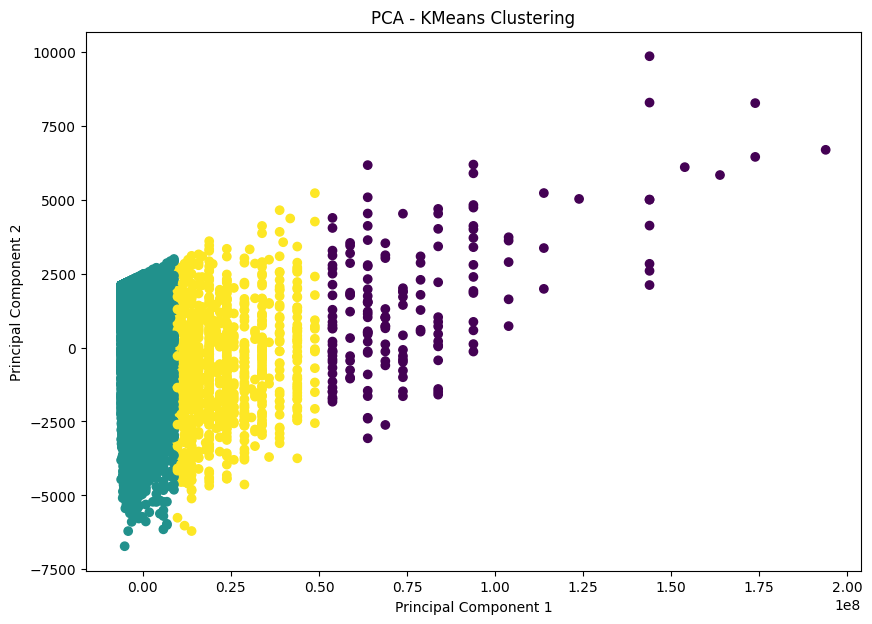

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('PCA - KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Agglomerative Clustering
We apply Agglomerative Clustering to hierarchically cluster the players and visualize the clusters using 'age' and 'highest_value'.

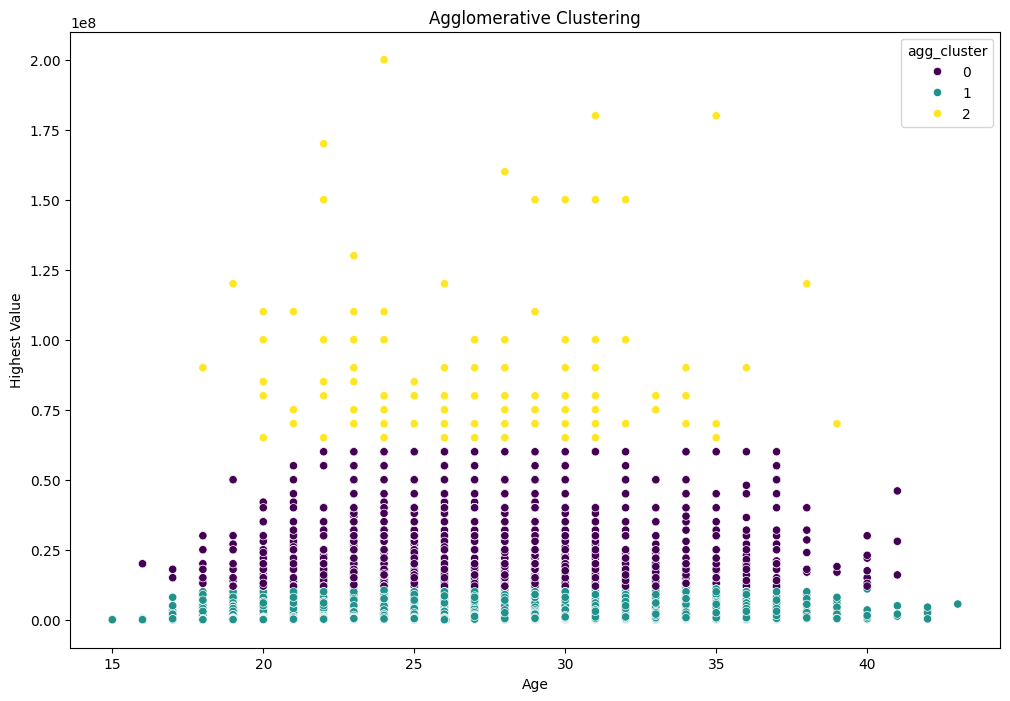

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Define the model
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model
x['agg_cluster'] = agg_clustering.fit_predict(x)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='highest_value', hue='agg_cluster', data=x, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('Highest Value')
plt.show()
